Import Dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#from config import weather_api_key
import requests

Finding count totals, Dropping NaN, dropping unnecessary columns

In [5]:
beer_df = pd.read_csv("../Resources/breweries.csv")
beer_df = beer_df[["id", "name", "brewery_type","street", "city", "state", "country", "longitude", "latitude"]]
dropped_df = beer_df.dropna()
display(dropped_df.count())
display(beer_df.count())

id              4805
name            4805
brewery_type    4805
street          4805
city            4805
state           4805
country         4805
longitude       4805
latitude        4805
dtype: int64

id              7797
name            7797
brewery_type    7797
street          6974
city            7797
state           7787
country         7797
longitude       4932
latitude        4932
dtype: int64

In [6]:
display(dropped_df)

,id,name,brewery_type,street,city,state,country,longitude,latitude
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,Knox,Indiana,United States,-86.627954,41.289715
3,10-barrel-brewing-co-bend-pub-bend,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,Bend,Oregon,United States,-121.280954,44.091211
4,10-barrel-brewing-co-boise-boise,10 Barrel Brewing Co - Boise,large,826 W Bannock St,Boise,Idaho,United States,-116.202929,43.618516
5,10-barrel-brewing-co-denver-denver,10 Barrel Brewing Co - Denver,large,2620 Walnut St,Denver,Colorado,United States,-104.985366,39.759251
6,10-barrel-brewing-co-portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,United States,-122.685506,45.525979
...,...,...,...,...,...,...,...,...,...
7790,zorn-brew-works-michigan-city,Zorn Brew Works,micro,605 E 9th St,Michigan City,Indiana,United States,-86.892168,41.714577
7792,zuni-street-brewing-company-denver,Zuni Street Brewing Company,micro,2355 W 29th Ave,Denver,Colorado,United States,-105.015409,39.758593
7793,zwanzigz-brewing-columbus,ZwanzigZ Brewing,brewpub,1038 Lafayette Ave,Columbus,Indiana,United States,-85.918836,39.208657
7795,zydeco-brew-werks-tampa,Zydeco Brew Werks,brewpub,1902 E 7th Ave,Tampa,Florida,United States,-82.437832,27.960344


Breakdown of states, might need to adjust all the names of the states for state code later on.

In [7]:
state_count = beer_df["state"].value_counts()
state_count = state_count.rename(index =({'Indiana': "IN"}))
display(state_count)

California              896
Colorado                429
Washington              422
New York                415
Michigan                375
Texas                   343
Pennsylvania            343
Florida                 312
North Carolina          307
Ohio                    303
Oregon                  291
Virginia                254
Illinois                249
Wisconsin               217
Minnesota               182
Massachusetts           163
IN                      162
Missouri                141
Arizona                 124
New Jersey              115
Maine                   114
Maryland                109
Tennessee               108
Georgia                  99
Connecticut              92
Montana                  92
Iowa                     87
New Mexico               83
South Carolina           76
New Hampshire            72
Idaho                    64
Vermont                  59
Kentucky                 58
Nebraska                 53
Nevada                   51
Alaska              

Sample Bar chart, real crowded looking

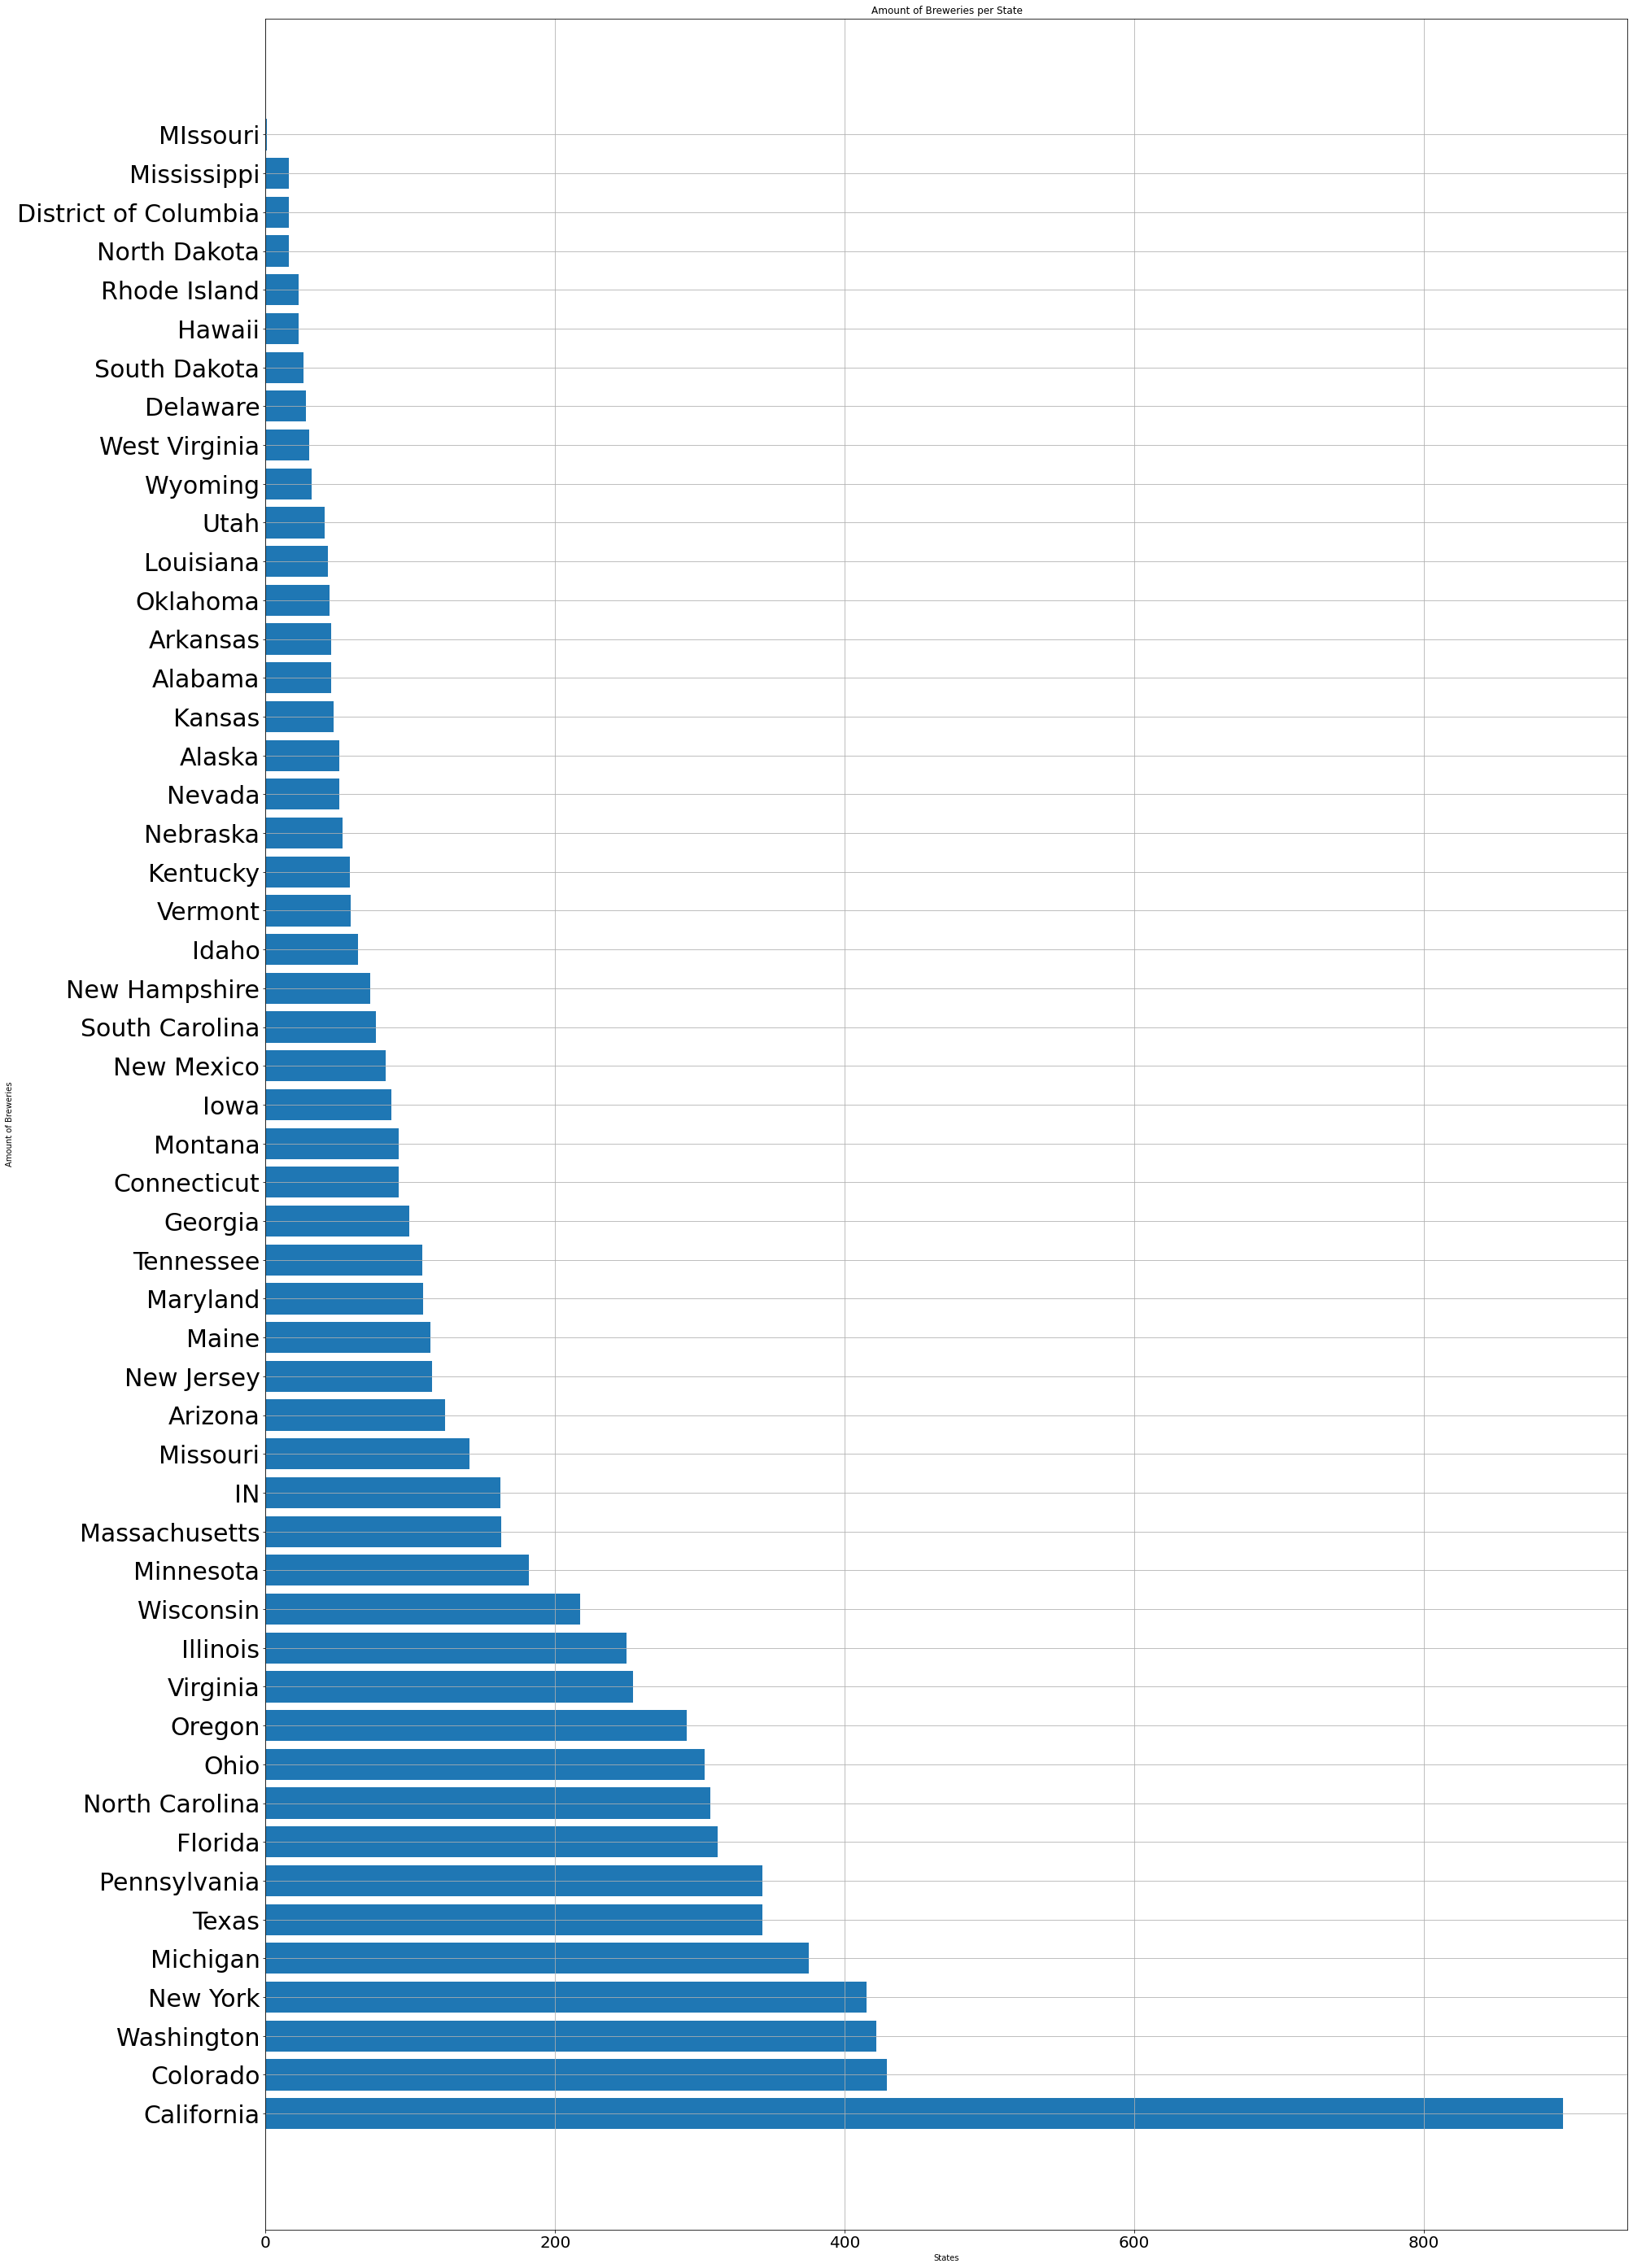

In [23]:
plt.barh(width=state_count, y=  state_count.index)
plt.xlabel("States")
plt.ylabel("Amount of Breweries")
plt.title("Amount of Breweries per State")
plt.grid(True)
#plt.xticks(rotation = 90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
plt.rcParams['figure.figsize']=[30,50]
#plt.figure(figsize=(100,50))
plt.show()

Breaking down breweries into types, crowded probably should convert some to "other"

In [13]:
small_batch_df = dropped_df[(dropped_df["brewery_type"] == "micro") | (dropped_df["brewery_type"] == "brewpub")]
types = beer_df["brewery_type"].value_counts()

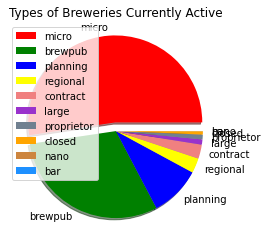

In [14]:
labels = types.index
explode = [.1,0,0,0,0,0,0,0,0,0]
colors = ["red", "green", "blue", "yellow", "lightcoral", "darkorchid", "slategray", "orange", "peru","dodgerblue"]
plt.pie(types,explode = explode, labels = labels, colors = colors, shadow = True)
plt.title("Types of Breweries Currently Active")
plt.legend()
plt.show()


Used homework code because I was curious about latitude/temperature/count relationship, didn't work need to adjust, original code used Georgetown colorado name for Georgetown, DC, need state codes

In [15]:
cities = beer_df["city"]
url = "http://api.openweathermap.org/data/2.5/forecast?q="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
found_lats = []
found_longs = []
for i, each_city in enumerate(cities[:10]):
    display(f"Processing Record {i} of Set 1 | {each_city}")
    city_json = requests.get(f'{url}{each_city}&appid={weather_api_key}').json()
    
    try:
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        found_city.append(each_city)
        found_lats.append(city_json["coord"]["lat"])
        found_longs.append(city_json["coord"]["lon"])
    except:
        display(f'{each_city} not found. Skipping...')
        pass

'Processing Record 0 of Set 1 | Knox'

'Knox not found. Skipping...'

'Processing Record 1 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 2 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 3 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 4 of Set 1 | Boise'

'Boise not found. Skipping...'

'Processing Record 5 of Set 1 | Denver'

'Denver not found. Skipping...'

'Processing Record 6 of Set 1 | Portland'

'Portland not found. Skipping...'

'Processing Record 7 of Set 1 | San Diego'

'San Diego not found. Skipping...'

'Processing Record 8 of Set 1 | Reno'

'Reno not found. Skipping...'

'Processing Record 9 of Set 1 | Quilcene'

'Quilcene not found. Skipping...'

In [40]:
weather_df = pd.DataFrame({
    "city" : found_city,
    "Lat" : found_lats,
    "Lng" : found_longs,
    "Max Temp (degrees F)" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
})
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32
weather_df.head()

NameError: name 'found_city' is not defined

Merged DataFrame, original bug shown with multiple incorrect Georgetowns

In [46]:
merged_df = pd.merge(dropped_df,weather_df, on = "city")
merged_df = merged_df.rename(columns = ({"Lat": "City Lat", "Lng" : "City Lng", "longitude" : "Brewery Longitude", "latitude": "Brewery Latitude"}))

,id,name,brewery_type,street,city,state,country,Brewery Longitude,Brewery Latitude,City Lat,City Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed
341,16-mile-brewing-co-georgetown,16 Mile Brewing Co,micro,413 S Bedford St,Georgetown,Delaware,United States,-75.378164,38.678894,5.4112,100.3354,86.000,61,20,3.60
342,barking-armadillo-brewing-georgetown,Barking Armadillo Brewing,micro,507 River Bend,Georgetown,Texas,United States,-97.693249,30.660811,5.4112,100.3354,86.000,61,20,3.60
343,guanella-pass-brewing-company-llc-georgetown,"Guanella Pass Brewing Company, LLC",micro,501 Rose Street,Georgetown,Colorado,United States,-105.697303,39.705772,5.4112,100.3354,86.000,61,20,3.60
405,2-tread-brewing-co-santa-rosa,2 Tread Brewing Co,brewpub,1018 Santa Rosa Plz,Santa Rosa,California,United States,-122.716773,38.438777,14.3122,121.1114,84.200,54,40,7.72
406,fogbelt-brewing-co-santa-rosa,Fogbelt Brewing Co,brewpub,1305 Cleveland Ave,Santa Rosa,California,United States,-122.726608,38.449000,14.3122,121.1114,84.200,54,40,7.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,stormcloud-brewing-company-frankfort,Stormcloud Brewing Company,brewpub,303 Main St,Frankfort,Michigan,United States,-86.241002,44.632906,-27.2667,28.4833,59.684,93,35,1.43
4554,stormcloud-brewing-company-production-facility...,Stormcloud Brewing Company Production Facility,micro,366 Parkview Ln,Frankfort,Michigan,United States,-86.221812,44.637393,-27.2667,28.4833,59.684,93,35,1.43
4571,talking-waters-brewing-co-montevideo,Talking Waters Brewing Co.,micro,205 S 1st St,Montevideo,Minnesota,United States,-95.723503,44.942758,-34.8335,-56.1674,69.008,82,0,1.54
4681,uncle-ernies-bayfront-grill-brew-house-panama-...,Uncle Ernies Bayfront Grill & Brew House,contract,1151 Bayview Ave,Panama City,Florida,United States,-85.702765,30.169812,8.9936,-79.5197,75.992,83,20,2.57


Orginal working code with bugs plot shown, didn't get to add in third variable of size of point equaling to amount of breweries per latitude

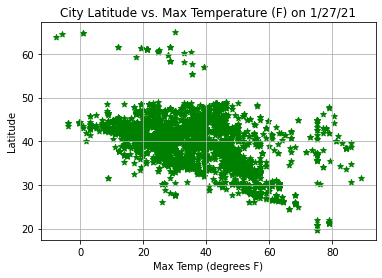

In [48]:
plt.scatter(y = merged_df["Brewery Latitude"], x = merged_df["Max Temp (degrees F)"],marker = "*", c= "g")
plt.ylabel("Latitude")
plt.xlabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/27/21")
plt.grid(True)
#plt.savefig("../output_data/Fig1")
plt.show()